In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import log_loss
from xgboost.sklearn import XGBClassifier

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
location="D:\s_chernov\AnacondaProjects\MLSSZ\Data\\"
df_train = pd.read_csv(location+"train.csv",sep=';',na_values="None")
df_test = pd.read_csv(location+"test.csv",sep=';',na_values="None")

In [3]:
del df_train['id']


In [4]:
df_train['age_year']=np.int16(df_train.age/365)
df_test['age_year']=np.int16(df_test.age/365)
df_train.loc[df_train.weight<20,'weight']=df_train.loc[df_train.weight<20,'weight']*10
df_test.loc[df_test.weight<20,'weight']=df_test.loc[df_test.weight<20,'weight']*10
df_train.loc[df_train.height<100,'height']=df_train.loc[df_train.height<100,'height']*10
df_test.loc[df_test.height<100,'height']=df_test.loc[df_test.height<100,'height']*10
#height and weight errors
correct=df_train.weight>df_train.height
correct_weight=df_train.loc[correct,'weight']
correct_height=df_train.loc[correct,'height']
df_train.loc[correct,'weight']=correct_height
df_train.loc[correct,'height']=correct_weight

correct=df_test.weight>df_test.height
correct_weight=df_test.loc[correct,'weight']
correct_height=df_test.loc[correct,'height']
df_test.loc[correct,'weight']=correct_height
df_test.loc[correct,'height']=correct_weight

#____ap_lo and ap_hi
df_train.loc[df_train.ap_lo<0,'ap_lo']=-df_train.loc[df_train.ap_lo<0,'ap_lo']
df_test.loc[df_test.ap_lo<0,'ap_lo']=-df_test.loc[df_test.ap_lo<0,'ap_lo']

df_train.loc[df_train.ap_lo>6000,'ap_lo']=df_train.loc[df_train.ap_lo>6000,'ap_lo']/100
df_train.loc[df_train.ap_lo>600,'ap_lo']=df_train.loc[df_train.ap_lo>600,'ap_lo']/10
df_test.loc[df_test.ap_lo>6000,'ap_lo']=df_test.loc[df_test.ap_lo>6000,'ap_lo']/100
df_test.loc[df_test.ap_lo>600,'ap_lo']=df_test.loc[df_test.ap_lo>600,'ap_lo']/10
df_train.loc[df_train.ap_lo<=10,'ap_lo']=df_train.loc[df_train.ap_lo<=10,'ap_lo']*10
df_test.loc[df_test.ap_lo<=10,'ap_lo']=df_test.loc[df_test.ap_lo<=10,'ap_lo']*10

df_train.loc[df_train.ap_hi<0,'ap_hi']=-df_train.loc[df_train.ap_hi<0,'ap_hi']
df_test.loc[df_test.ap_hi<0,'ap_hi']=-df_test.loc[df_test.ap_hi<0,'ap_hi']

df_train.loc[df_train.ap_hi>=10000,'ap_hi']=df_train.loc[df_train.ap_hi>=10000,'ap_hi']/100
df_test.loc[df_test.ap_hi>=10000,'ap_hi']=df_test.loc[df_test.ap_hi>=10000,'ap_hi']/100
df_train.loc[df_train.ap_hi>=300,'ap_hi']=df_train.loc[df_train.ap_hi>=300,'ap_hi']/10
df_test.loc[df_test.ap_hi>=300,'ap_hi']=df_test.loc[df_test.ap_hi>=300,'ap_hi']/10

df_train.loc[df_train.ap_hi<30,'ap_hi']=df_train.loc[df_train.ap_hi<30,'ap_hi']*10
df_test.loc[df_test.ap_hi<30,'ap_hi']=df_test.loc[df_test.ap_hi<30,'ap_hi']*10

correct=df_train.ap_hi<df_train.ap_lo
correct_hi=df_train.loc[correct,'ap_hi']
correct_lo=df_train.loc[correct,'ap_lo']
df_train.loc[correct,'ap_hi']=correct_lo
df_train.loc[correct,'ap_lo']=correct_hi

correct=df_test.ap_hi<df_test.ap_lo
correct_hi=df_test.loc[correct,'ap_hi']
correct_lo=df_test.loc[correct,'ap_lo']
df_test.loc[correct,'ap_hi']=correct_lo
df_test.loc[correct,'ap_lo']=correct_hi

In [5]:
df_train['age_year']=np.int16(df_train.age/365)
df_test['age_year']=np.int16(df_test.age/365)
df_train['ap_div']=df_train.ap_lo/df_train.ap_hi
df_test['ap_div']=df_test.ap_lo/df_train.ap_hi
df_train['fat']=df_train.weight/(((df_train.height)/100)**2)
df_test['fat']=df_test.weight/(((df_train.height)/100)**2)
df_train['diff_weight']=50+0.75*(df_train.height-150) + (df_train.age_year-20)/4-df_train.weight
df_test['diff_weight']=50+0.75*(df_test.height-150) + (df_test.age_year-20)/4-df_test.weight
df_train['age_weight']=df_train.age/df_train.weight
df_test['age_weight']=df_test.age/df_test.weight

In [6]:
df_test.alco=df_test.alco.fillna(0)
df_test.smoke=df_test.smoke.fillna(0)
df_test.active=df_test.active.fillna(0)
features=list(df_train.columns)
features.remove('cardio')


In [7]:
df_train.age=(df_train.age/10000)**2
df_test.age=(df_test.age/10000)**2


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_train.loc[:,features], df_train.cardio, test_size=0.3, random_state=123)


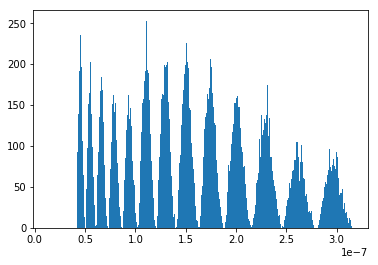

In [9]:
plt.hist((df_train.age/10000)**2,1000)
plt.show()

In [10]:
xgb_params = {
    'gamma': 0.05,
    'max_depth': 5,
    'learning_rate': 0.05,
    'min_child_weight' : 1 ,
    'n_estimators': 1000,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'silent': 1,
    'seed':123
}


#cvresult = xgb.cv(xgb_params, dtrain, num_boost_round=1000, nfold=5,early_stopping_rounds=50, seed=123)

In [11]:
def xgb_factory(xgb_params):
    return( xgb.XGBClassifier(
             learning_rate=xgb_params['learning_rate'],
             n_estimators=xgb_params['n_estimators'],
             max_depth=xgb_params['max_depth'],
             min_child_weight=xgb_params['min_child_weight'],
             gamma=xgb_params['gamma'],
             subsample=xgb_params['subsample'],
             colsample_bytree=xgb_params['colsample_bytree'],
             objective=xgb_params['objective'],
             nthread=4,
             scale_pos_weight=1,
             seed=xgb_params['seed']))
       

In [12]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=123)

In [13]:
from sklearn.model_selection import GridSearchCV

#tune max_depth, min_child_weight
hyper = xgb_factory(xgb_params)
param_grid = {
    
 'max_depth':range(3,8,1),
 'min_child_weight':range(1,6,2)
}

alg_xgb_grid = GridSearchCV(hyper, param_grid,cv=cv, scoring='neg_log_loss',refit=True, verbose=1, n_jobs=4)
alg_xgb_grid.fit(x_train,y_train)
alg_xgb_best = alg_xgb_grid.best_estimator_
print("Accuracy (xgboost auto): {} with params {}"
      .format(alg_xgb_grid.best_score_, alg_xgb_grid.best_params_))

xgb_params['max_depth']=alg_xgb_grid.best_params_['max_depth']
xgb_params['min_child_weight']=alg_xgb_grid.best_params_['min_child_weight']
#-0.5411401883 with params {'max_depth': 3, 'min_child_weight': 5}


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed: 12.0min finished


Accuracy (xgboost auto): -0.541715569159 with params {'max_depth': 3, 'min_child_weight': 5}


In [14]:
#tune gamma
hyper = xgb_factory(xgb_params)

param_grid2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
alg_xgb_grid = GridSearchCV(hyper, param_grid2,cv=cv, scoring='neg_log_loss',refit=True, verbose=1, n_jobs=4)
alg_xgb_grid.fit(x_train,y_train)
alg_xgb_best = alg_xgb_grid.best_estimator_
print("Accuracy (xgboost autтакo): {} with params {}"
      .format(alg_xgb_grid.best_score_, alg_xgb_grid.best_params_))

xgb_params['gamma']=alg_xgb_grid.best_params_['gamma']
#Accuracy (xgboost auto): -0.5411144988 with params {'gamma': 0.0}

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  2.6min finished


Accuracy (xgboost autтакo): -0.541692974281 with params {'gamma': 0.4}


In [15]:
hyper = xgb_factory(xgb_params)

param_grid3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

alg_xgb_grid = GridSearchCV(hyper, param_grid3,cv=cv, scoring='neg_log_loss',refit=True, verbose=1, n_jobs=4)
alg_xgb_grid.fit(x_train,y_train)
alg_xgb_best = alg_xgb_grid.best_estimator_
print("Accuracy (xgboost auto): {} with params {}"
      .format(alg_xgb_grid.best_score_, alg_xgb_grid.best_params_))

xgb_params['subsample']=alg_xgb_grid.best_params_['subsample']
xgb_params['colsample_bytree']=alg_xgb_grid.best_params_['colsample_bytree']
#Accuracy (xgboost auto): -0.541452242307 with params {'subsample': 0.9, 'colsample_bytree': 0.6}

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  8.9min finished


Accuracy (xgboost auto): -0.541715599754 with params {'subsample': 0.9, 'colsample_bytree': 0.6}


In [16]:
hyper = xgb_factory(xgb_params)
param_grid4 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

alg_xgb_grid = GridSearchCV(hyper, param_grid4,cv=cv, scoring='neg_log_loss',refit=True, verbose=1, n_jobs=4)
alg_xgb_grid.fit(x_train,y_train)
alg_xgb_best = alg_xgb_grid.best_estimator_
print("Accuracy (xgboost auto): {} with params {}"
      .format(alg_xgb_grid.best_score_, alg_xgb_grid.best_params_))

xgb_params['reg_alpha']=alg_xgb_grid.best_params_['reg_alpha']


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  2.5min finished


Accuracy (xgboost auto): -0.541562854457 with params {'reg_alpha': 0.05}


In [17]:
hyper = xgb_factory(xgb_params)
fit=hyper.fit(x_train,y_train,eval_metric='logloss')

In [18]:
pred = fit.predict_proba(x_test)[:,1]
print '________________'
print log_loss (y_test,pred)
pred
#0.540119912811
#0.540036345813
#0.539940924247

#0.540712189973 - cv
#0.541619747006
#0.541619747006

________________
0.542081671288


array([ 0.13609713,  0.14159682,  0.40685472, ...,  0.43587339,
        0.25880802,  0.35816059], dtype=float32)

In [19]:
fit

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.4, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=123, silent=True, subsample=0.9)

In [20]:
#model=hyper.fit(df_train.loc[:,features],df_train.cardio,eval_metric='logloss')


fit=hyper.fit(x_train,y_train,eval_metric='logloss')

#model = xgb.train(xgb_params,dtrain_all, num_boost_round=num_boost_round)
#pred = model.predict(dtest)
pred = fit.predict_proba(df_test.loc[:,features])[:,1]

In [21]:
res=pd.DataFrame({'cardio':pred},columns=['id','cardio'])
res.cardio.to_csv(location+'submission.csv',index=False,header=False)

In [22]:
xgb_params

{'colsample_bytree': 0.6,
 'eval_metric': 'logloss',
 'gamma': 0.4,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 1000,
 'objective': 'binary:logistic',
 'reg_alpha': 0.05,
 'seed': 123,
 'silent': 1,
 'subsample': 0.9}

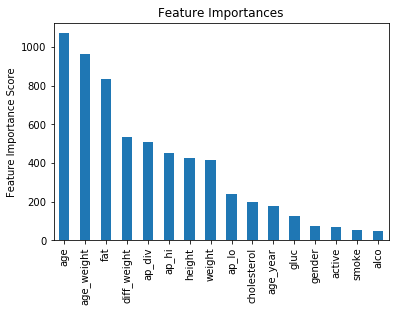

In [23]:
feat_imp = pd.Series(hyper.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()